In [5]:
import cv2
import pylab as plt
import dask
from tifffile import imread
import numpy as np
from mptracker import MPTracker
from ipywidgets import *
from IPython.display import display
import pylab as plt
# Load data
data = imread('/Users/joao/data/eyecam/20171009_run000_00000000.tif')
data = imread('/Users/joao/Downloads/test4.tif')
# Load parameters
import json
with open('/Users/joao/lib/mptracker/notebooks/test1.json','r') as f:
    params = json.load(f)
# Init tracker
tracker = MPTracker(params)
tracker.setROI(params['points'])

<IPython.core.display.Javascript object>


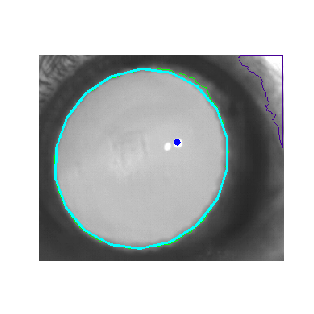

IntSlider(value=210, description=u'Frame', max=1742)

In [18]:
def nbPlayTracking(data,tracker):
    dd = data[210]
    tdat = tracker.apply(dd)
    im = plt.imshow(tdat[0])
    slider = widgets.IntSlider(210,
                               min = 0,
                               max = len(data)-1,
                               step = 1,
                               description='Frame')
    display(slider)
    def updateImage(change):
        dd = data[change['new']]
        tdat = tracker.apply(dd)
        im.set_data(tdat[0])
    slider.observe(updateImage, names='value')
%matplotlib notebook
fig = plt.figure(figsize=[3.5,3.5])
nbPlayTracking(data,tracker)
plt.axis('off');


['azimuth', 'crPix', 'diameter', 'elevation', 'ellipsePix', 'pointsPix', 'positionPix', 'theta']


<IPython.core.display.Javascript object>


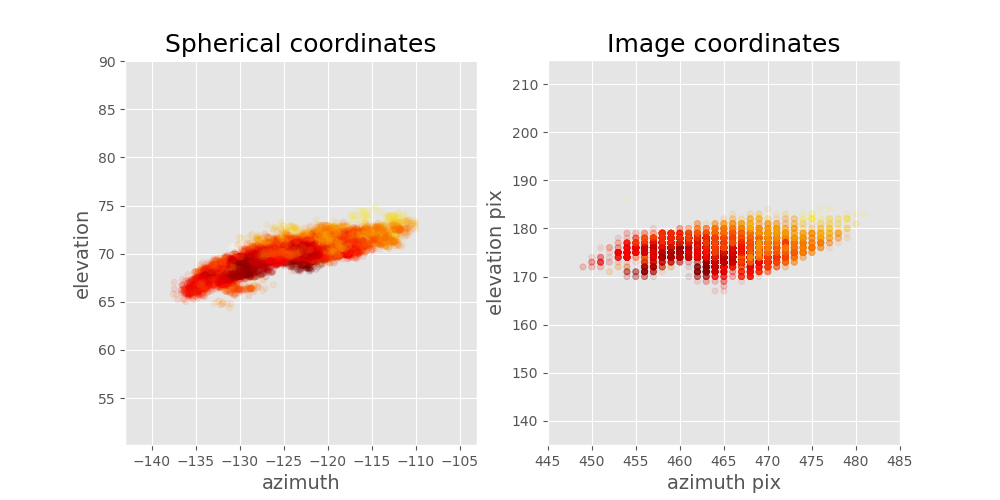

Text(0.5, 1.0, 'Image coordinates')

In [34]:
import h5py as h5
import numpy as np
import pylab as plt
import mptracker as mpt
fname  = '/home/joao/data/eyecam/181112_JC086_2P_JC/run00_gray/results.mptracker'
with h5.File(fname) as fd:
    print(list(fd.keys()))
    azimuth = fd['azimuth'][:]
    elevation = fd['elevation'][:]
    diameter = fd['diameter'][:]
    positionPix = fd['positionPix'][:]
%matplotlib notebook
plt.matplotlib.style.use('ggplot')
fig = plt.figure(figsize = [10,5])
fig.add_subplot(1,2,1)
plt.scatter(azimuth,elevation,20,diameter,alpha = 0.1,clim=[0.5,2.5],cmap = 'hot')
plt.axis(np.hstack([np.nanmedian(azimuth)+np.array([-20,20]),np.nanmedian(elevation)+np.array([-20,20])]));
plt.xlabel('azimuth',fontsize = 14)
plt.ylabel('elevation',fontsize = 14)
plt.title('Spherical coordinates',fontsize = 18)
fig.add_subplot(1,2,2)
az = positionPix[:,0]
el = positionPix[:,1]
plt.scatter(az,el,20,diameter,alpha = 0.1,clim=[0.5,2.5],cmap = 'hot')
plt.axis(np.hstack([np.nanmedian(az)+np.array([-20,20]),np.nanmedian(el)+np.array([-40,40])]));
plt.xlabel('azimuth pix',fontsize = 14)
plt.ylabel('elevation pix',fontsize = 14)
plt.title('Image coordinates',fontsize = 18)


<IPython.core.display.Javascript object>


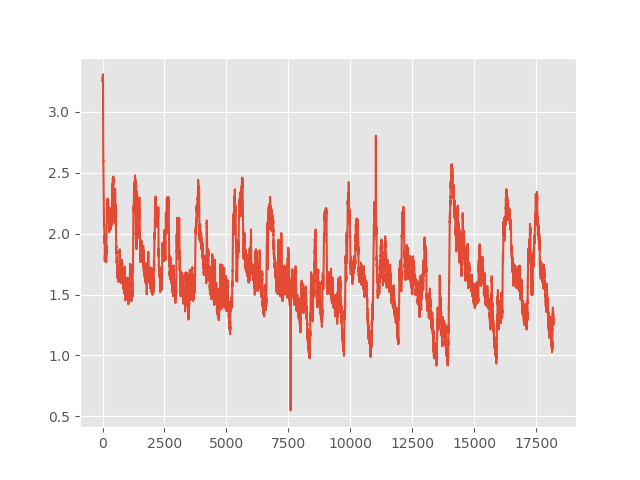

<IPython.core.display.Javascript object>


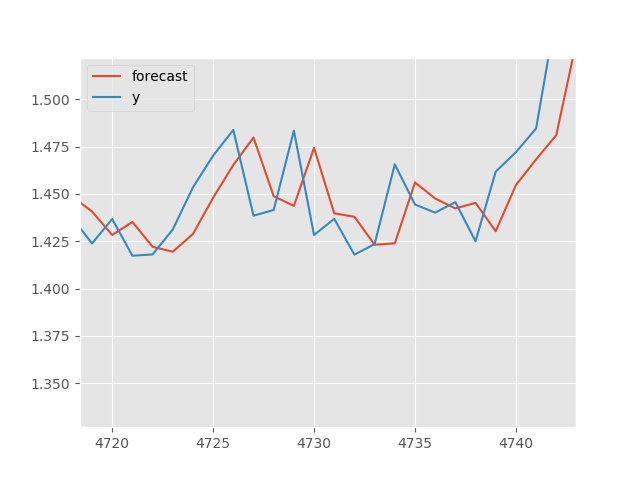

In [71]:
%matplotlib notebook
plt.plot(diameter[~np.isnan(diameter)])
from statsmodels.tsa.arima_model import ARMA,AR

# Forecast the first AR(1) model
mod = ARMA(diameter[~np.isnan(diameter)],[1,1])
res = mod.fit()
res.plot_predict()
res

<IPython.core.display.Javascript object>


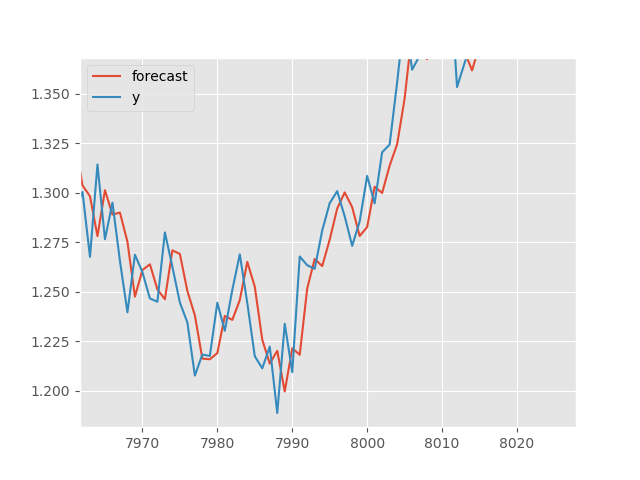

<IPython.core.display.Javascript object>


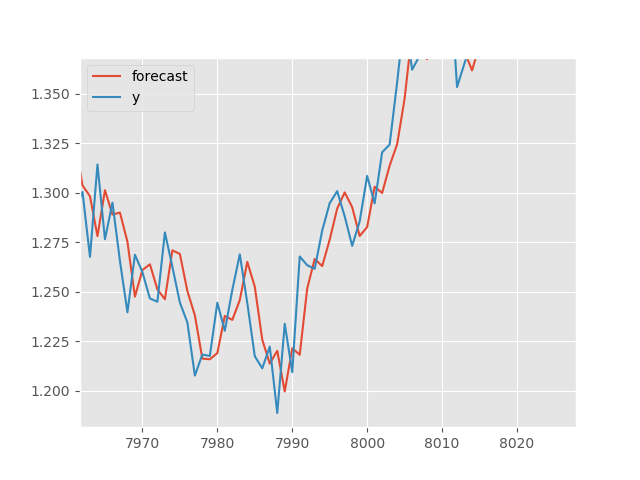

In [53]:
res.plot_predict()

In [39]:
diameter[~np.isnan(diameter)].shape

(18201,)

TypeError: predict() missing 1 required positional argument: 'params'